# Gaussian Grid RBM Demo

### Step 1: Load all necessary modules and generate the data

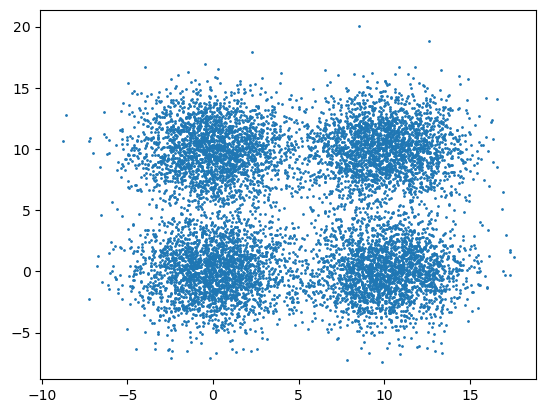

In [61]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, 
                                                   samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(2, 2, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=1)

### Step 2: Train the RBM (no adversary)

In [68]:
model = rbm.RBM(
    n_vis=2,
    n_hid=10,
    var=None
)
stats = model.fit(
    X=X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=100,
    batch_size=50,
    gamma=0,
    gamma_delay=0,
    rng_seed=0,
    verbose_interval=5,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo.pth'
)

epoch: 000 of 100 | recon_mse: 20.573 | kl_data_model: 3.391 | kl_model_data: 2.705
epoch: 005 of 100 | recon_mse: 26.396 | kl_data_model: 4.173 | kl_model_data: 3.142
epoch: 010 of 100 | recon_mse: 25.077 | kl_data_model: 4.495 | kl_model_data: 3.646
epoch: 015 of 100 | recon_mse: 18.844 | kl_data_model: 3.531 | kl_model_data: 3.276
epoch: 020 of 100 | recon_mse: 20.561 | kl_data_model: 3.998 | kl_model_data: 2.788
epoch: 025 of 100 | recon_mse: 21.523 | kl_data_model: 3.833 | kl_model_data: 2.821
epoch: 030 of 100 | recon_mse: 20.387 | kl_data_model: 4.012 | kl_model_data: 2.435
epoch: 035 of 100 | recon_mse: 16.771 | kl_data_model: 3.715 | kl_model_data: 3.238
epoch: 040 of 100 | recon_mse: 19.822 | kl_data_model: 3.759 | kl_model_data: 3.446
epoch: 045 of 100 | recon_mse: 17.05 | kl_data_model: 3.251 | kl_model_data: 2.787
epoch: 050 of 100 | recon_mse: 16.56 | kl_data_model: 2.732 | kl_model_data: 2.016
epoch: 055 of 100 | recon_mse: 20.068 | kl_data_model: 2.768 | kl_model_data: 

### Step 3: Visualize the learning process

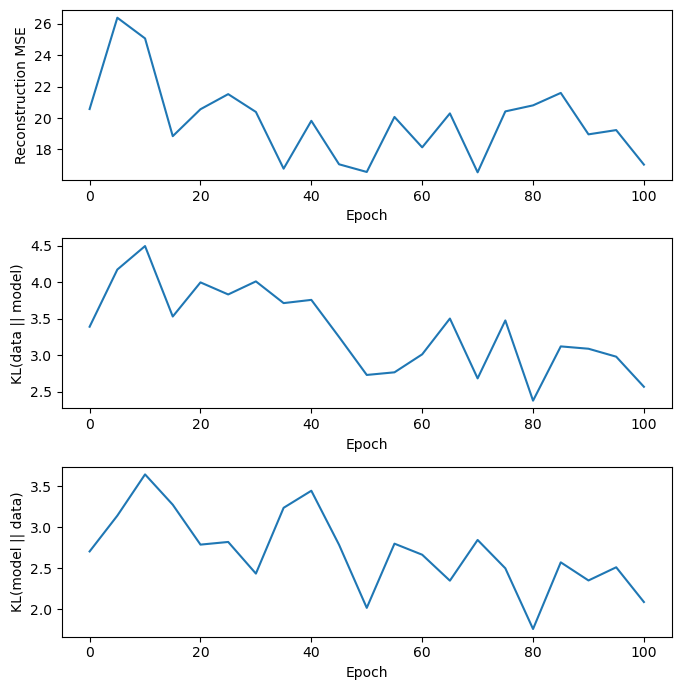

In [69]:
def visualize_learning(stats):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
    axs[0].plot(stats['epoch_num'], stats['recon_mse'])
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Reconstruction MSE')
    axs[1].plot(stats['epoch_num'], stats['kl_data_model'])
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('KL(data || model)')
    axs[2].plot(stats['epoch_num'], stats['kl_model_data'])
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('KL(model || data)')
    plt.tight_layout()
visualize_learning(stats)


### Step 4: Visualize the learned distribution

tensor([3.4769, 3.2602], grad_fn=<ExpBackward0>)


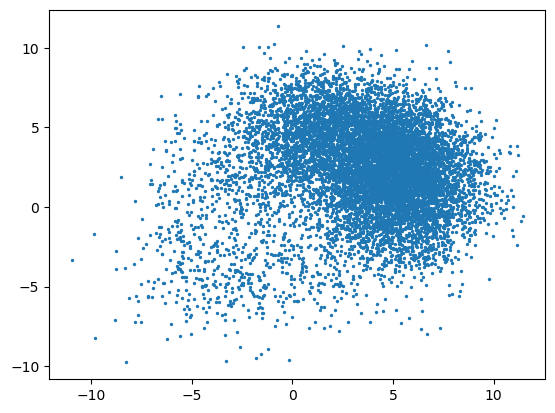

In [70]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo.pth')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=1000
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

### Repeat Step 2 for RBM with adversarial training

In [23]:
model_adversarial = rbm.RBM(
    n_vis=2,
    n_hid=20
)
stats_adv = model_adversarial.fit_autograd(
    X=X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=55,
    batch_size=50,
    gamma=0.1,
    gamma_delay=20,
    rng_seed=0,
    verbose_interval=1,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo_adv.pth'
)

epoch: 00 of 55 | recon_mse: 54.603 | kl_data_model: 7.157 | kl_model_data: 4.36
epoch: 01 of 55 | recon_mse: 30.068 | kl_data_model: 6.637 | kl_model_data: 3.568
epoch: 02 of 55 | recon_mse: 22.515 | kl_data_model: 6.305 | kl_model_data: 3.206
epoch: 03 of 55 | recon_mse: 18.482 | kl_data_model: 6.099 | kl_model_data: 3.244
epoch: 04 of 55 | recon_mse: 15.575 | kl_data_model: 5.456 | kl_model_data: 2.989
epoch: 05 of 55 | recon_mse: 12.988 | kl_data_model: 4.858 | kl_model_data: 2.846
epoch: 06 of 55 | recon_mse: 12.016 | kl_data_model: 5.367 | kl_model_data: 3.104
epoch: 07 of 55 | recon_mse: 10.612 | kl_data_model: 4.803 | kl_model_data: 2.77
epoch: 08 of 55 | recon_mse: 9.729 | kl_data_model: 4.775 | kl_model_data: 2.691
epoch: 09 of 55 | recon_mse: 8.725 | kl_data_model: 4.403 | kl_model_data: 2.412
epoch: 10 of 55 | recon_mse: 7.935 | kl_data_model: 4.194 | kl_model_data: 2.428
epoch: 11 of 55 | recon_mse: 7.875 | kl_data_model: 4.393 | kl_model_data: 2.47
epoch: 12 of 55 | recon

### Repeat Step 3 for RBM adversarial training

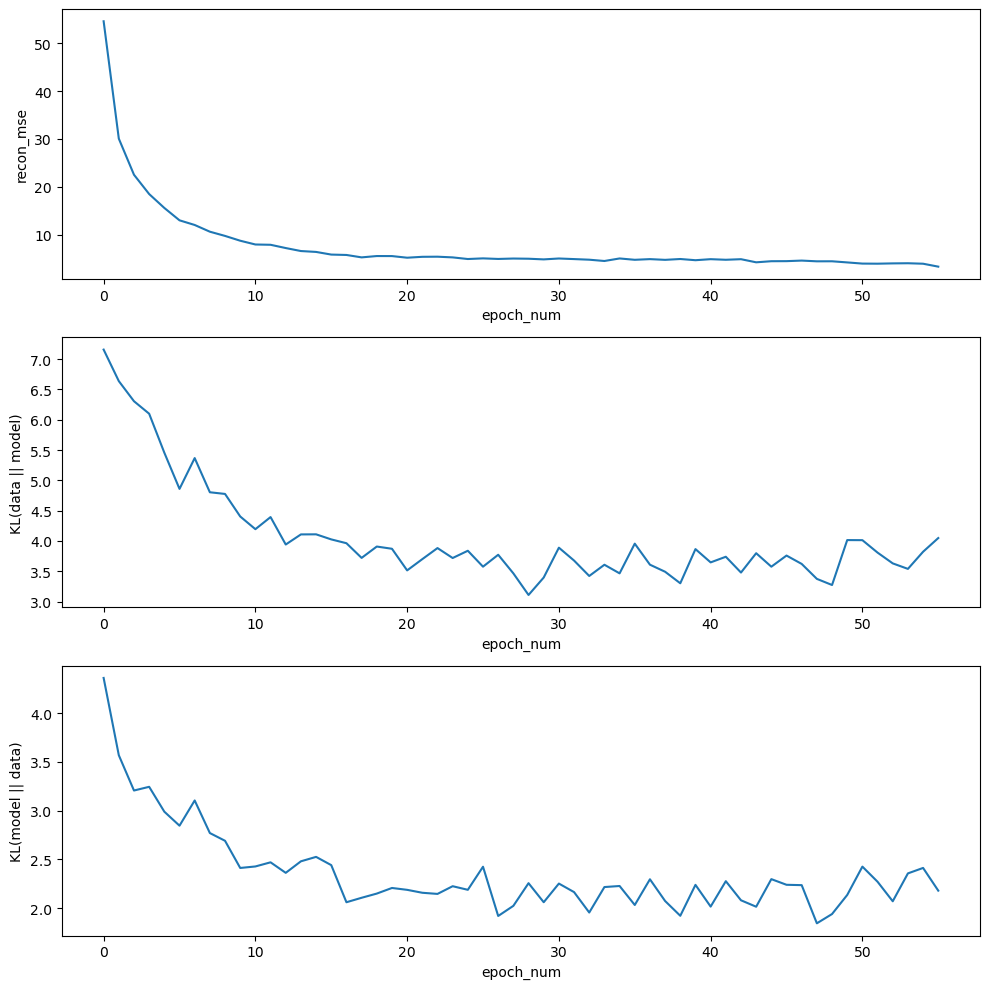

In [24]:
visualize_learning(stats_adv)

### Repeat Step 4 for RBM adversarial training

tensor([23.0545, 21.9785], grad_fn=<ExpBackward0>)


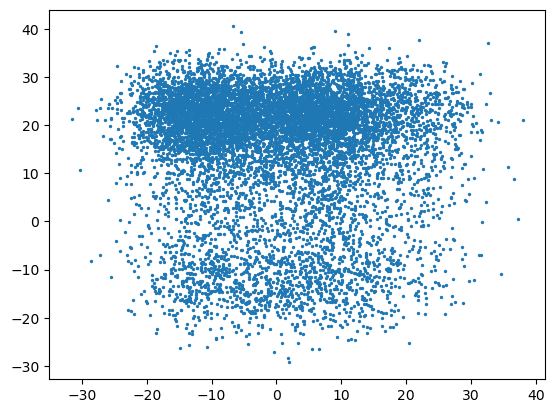

In [22]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo_adv.pth')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)